## Importing Packages

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 500)

## Reading CSV Data

In [106]:
df = pd.read_csv('WISDM.csv', na_values=["?"])
df.drop(["UNIQUE_ID", "XAVG", "ZSTANDDEV", "XPEAK", "YPEAK", "ZPEAK"],axis=1, inplace=True)
df.head()

,user,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,YAVG,ZAVG,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,RESULTANT,class
0,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,0.13,0.08,0.09,0.10,0.11,0.11,0.08,0.04,0.16,0.13,0.10,0.03,0.12,0.08,0.09,0.12,0.10,0.10,0.08,0.11,0.12,0.10,8.40,1.76,3.29,7.21,4.00,4.05,8.17,11.96,Jogging
1,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,0.12,0.10,0.12,0.11,0.07,0.10,0.13,0.13,0.06,0.11,0.10,0.04,0.11,0.11,0.11,0.09,0.12,0.10,0.11,0.10,0.07,0.08,7.62,1.43,4.23,6.88,4.05,5.43,8.19,12.05,Jogging
2,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,0.05,0.12,0.09,0.10,0.12,0.10,0.10,0.12,0.08,0.07,0.10,0.06,0.07,0.11,0.10,0.09,0.08,0.11,0.11,0.09,0.10,0.12,7.77,2.39,4.18,6.89,4.07,5.55,8.19,11.99,Jogging
3,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,0.14,0.14,0.12,0.08,0.11,0.10,0.10,0.11,0.11,0.10,0.08,0.11,0.10,0.10,0.11,0.10,0.09,0.07,0.12,0.14,0.07,0.11,9.57,0.49,2.26,4.13,2.49,2.87,4.95,10.69,Walking
4,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,0.08,0.07,0.10,0.11,0.07,0.09,0.10,0.11,0.10,0.11,0.14,0.09,0.10,0.09,0.11,0.10,0.11,0.11,0.08,0.09,0.14,0.10,9.76,0.51,2.29,3.94,2.41,3.08,4.64,10.80,Walking


## Visualizing Classes

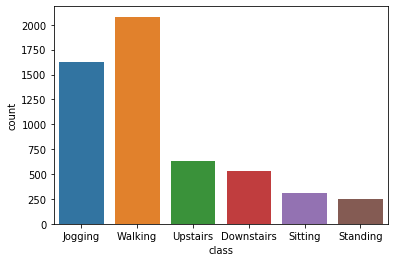

In [108]:
sns.countplot(df["class"])
plt.show()

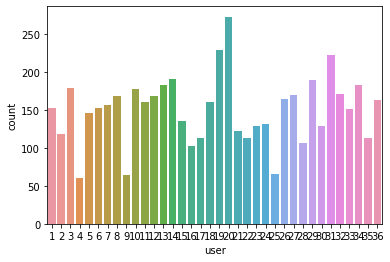

In [107]:
sns.countplot(df["user"])
plt.show()

## Label Encoding

In [109]:
classEncoder = LabelEncoder()
df["class"] = classEncoder.fit_transform(df["class"])
classEncoder.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## Train test split

In [155]:
X = df.drop(["user", "class"], 1)
Y = df[["user", "class"]]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.1, random_state=10, stratify = Y)
trainX.shape, trainY.shape

((4876, 38), (4876, 2))

In [156]:
csf = RandomForestClassifier(n_estimators=500)
csf.fit(trainX, trainY)
pred = csf.predict(testX)

## Accuracy

In [157]:
print('Accuracy with User : ', round((pred[:,0] == testY.iloc[:,0]).sum()/len(pred), 3))
print('Accuracy with Class : ', round((pred[:,1] == testY.iloc[:,1]).sum()/len(pred), 3))

Accuracy with User :  0.886
Accuracy with Class :  0.915


In [158]:
pred = pd.DataFrame(pred, columns=['user', 'class'])

In [159]:
pred.iloc[:,1] = clEnc.inverse_transform(pred.iloc[:,1])

## Confusion Matrix

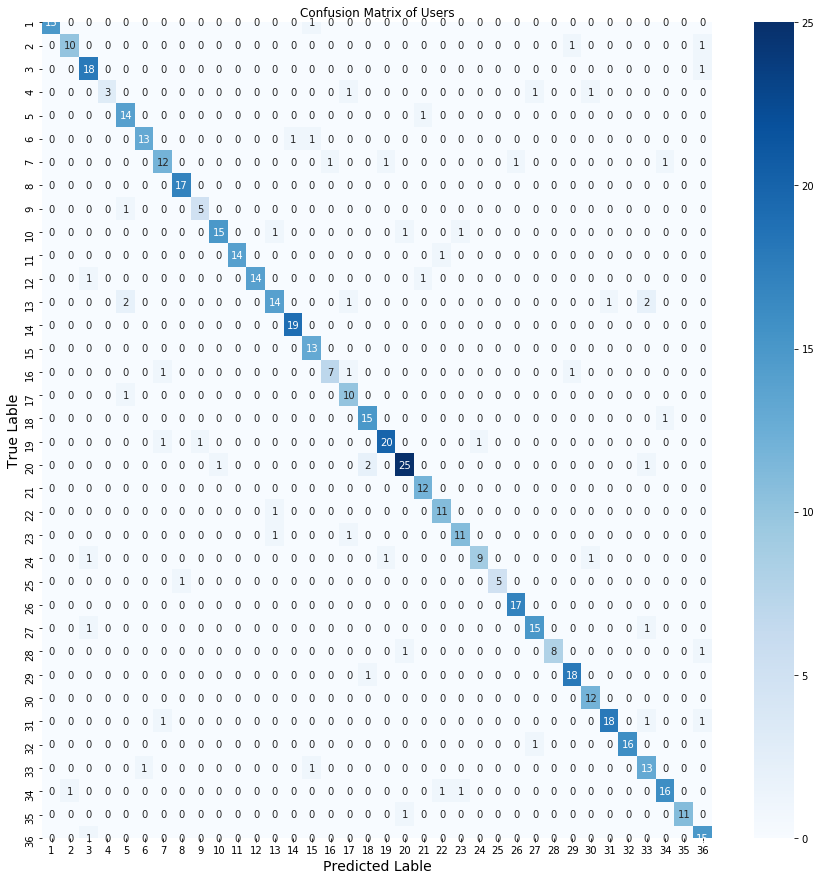

In [160]:
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(confusion_matrix(testY.iloc[:,0], pred.iloc[:,0]), index = [i for i in range(1,37)], columns = [i for i in  range(1,37)])
sns.heatmap(df_cm, cmap = plt.cm.Blues, annot=True)
plt.xlabel('Predicted Lable', fontsize = 14)
plt.ylabel('True Lable', fontsize = 14)
plt.title('Confusion Matrix of Users')
plt.show()

In [161]:
testY.iloc[:,1] = clEnc.inverse_transform(testY.iloc[:,1])

/home/aiteamt2/.local/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


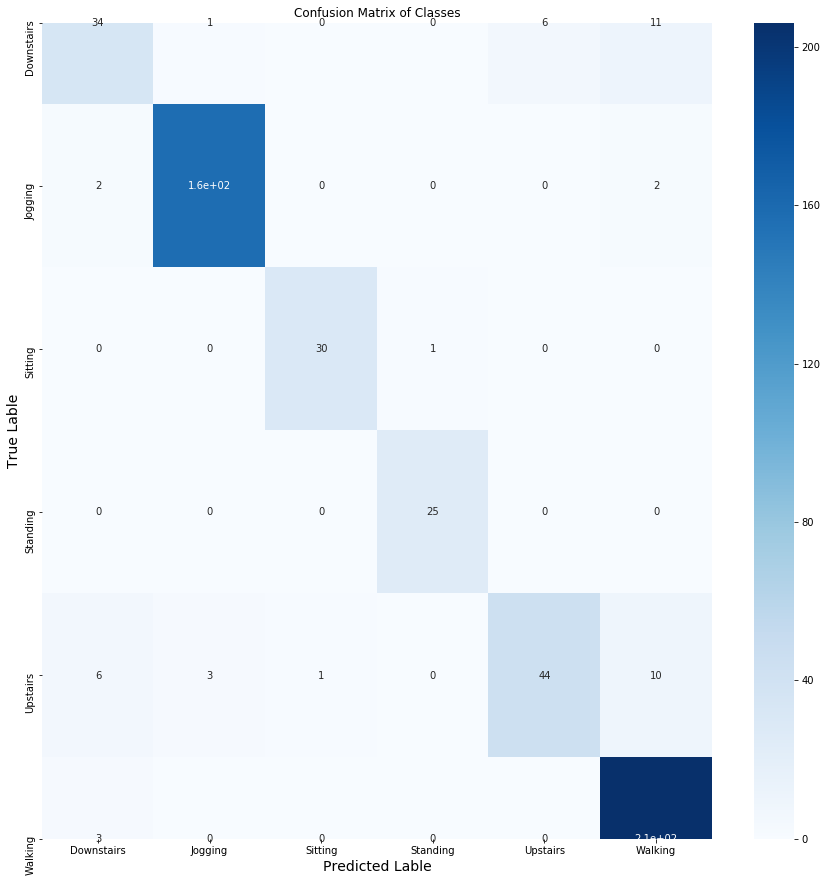

In [162]:
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(confusion_matrix(testY.iloc[:,1], pred.iloc[:,1]), index = clEnc.classes_, columns = clEnc.classes_)
sns.heatmap(df_cm, cmap = plt.cm.Blues, annot=True)
plt.xlabel('Predicted Lable', fontsize = 14)
plt.ylabel('True Lable', fontsize = 14)
plt.title('Confusion Matrix of Classes')
plt.show()